In [ ]:
%load_ext autoreload
%autoreload 2

### Using Locally Hosted Huggingface LM

Run
```
python3 manifest/api/app.py --model_type huggingface --model_name_or_path EleutherAI/gpt-neo-125M --device 0
```
in a separate `screen` or `tmux`.

In [18]:
from manifest import Manifest

# Local hosted GPT Neo 125M
manifest = Manifest(
    client_name="huggingface",
    client_connection="http://127.0.0.1:6001",
    cache_name="sqlite",
    cache_connection="my_sqlite_manifest.sqlite"
)
print(manifest.client_pool.get_current_client().get_model_params())

{'model_name': 'EleutherAI/gpt-neo-125M', 'model_path': 'EleutherAI/gpt-neo-125M'}


### Using Locally Hosted Huggingface Diffusers

Run
```
python3 manifest/api/app.py --model_type diffuser --model_name_or_path runwayml/stable-diffusion-v1-5 --device 0
```
in a separate `screen` or `tmux`.

In [19]:
from manifest import Manifest

manifest_diff = Manifest(
    client_name="diffuser",
    client_connection="http://127.0.0.1:6000",
    cache_name="sqlite",
    cache_connection="my_sqlite_manifest.sqlite"
)
print(manifest_diff.client_pool.get_current_client().get_model_params())

{'model_name': 'runwayml/stable-diffusion-v1-5', 'model_path': 'runwayml/stable-diffusion-v1-5'}


In [20]:
ingredients = manifest.run("What are best vegetables for a sandwhich? The ingrediates are lettuce,", stop_token="\n")
print(ingredients)

carrots, onions, radishes, and spinach.


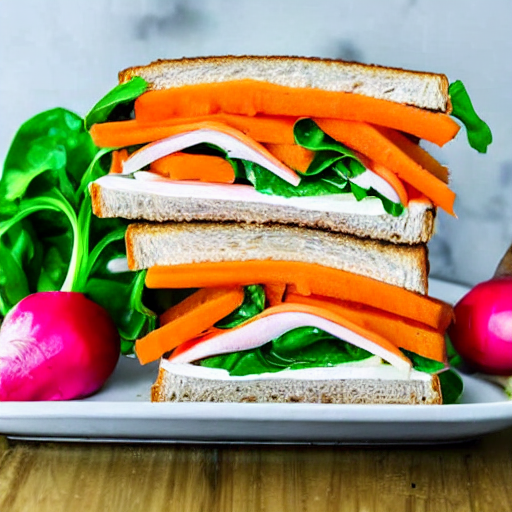

In [21]:
from PIL import Image

res = manifest_diff.run(f"Sandwich with {ingredients}", client_timeout=300)
im = Image.fromarray(res)
display(im)

Comparing with and without a cache

In [ ]:
import time
import numpy as np

manifest = Manifest(
    client_name="tomadiffuser",
    cache_name="sqlite",
    cache_connection="my_sqlite_manifest.sqlite"
)

st = time.time()
res = manifest.run("Coloring book image of a horse", overwrite_cache=True)
im = Image.fromarray(res)
display(im)
print(f"Took {time.time() - st:.2f} seconds")

st = time.time()
res = manifest.run("Coloring book image of a horse")
im = Image.fromarray(np.array(res))
display(im)
print(f"Now took {time.time() - st:.2f} seconds")